# Twitter数据爬取，清洗与分析

## 简介

我们将要整理 (以及分析和可视化) 的数据集是推特用户 @dog_rates 的档案, 推特昵称为 WeRateDogs。他以诙谐幽默的方式对人们的宠物狗评分。这些评分通常以 10 作为分母。但是分子则一般大于 10：11/10、12/10、13/10 等等。

WeRateDogs下载了他们的推特档案，并通过电子邮件发送给优达学城，专门为本项目使用。这个档案是基本的推特数据（推特 ID、时间戳、推特文本等），包含了截止到 2017 年 4 月 1 日的 5000 多条推特。


### 目标
清洗 WeRateDogs 推特数据，创建有趣且可靠的分析和可视化。<br/>
（但是这份推特档案只包含基本的推特信息。所以还需要收集额外的数据。）<br/>
<br/>
我们在这个项目中的任务如下：<br/>
数据整理，其中包括：<br/>
收集数据，评估数据，清洗数据。<br/>
对清洗过的数据进行储存、分析和可视化。<br/>
书面报告 (1) 数据整理工作 (2) 数据分析和可视化<br/>


### 步骤与细节

#### 1.数据收集
收集下面所述的三份数据：<br/>

1. WeRateDogs 的推特档案。这个数据文件是直接提供的，详见twitter_archive_enhanced.csv。
2. 推特图像的预测数据，这个文件你需要使用 Python 的 Requests 库和以下提供的 URL 来进行编程下载。
3. 每条推特的额外附加数据，要包含转发数（retweet_count）和喜欢数（favorite_count）这两列。推荐使用Twitter API。


#### 2.数据评估
收集上述三个数据集之后，使用目测评估和编程评估的方式，对数据进行质量和清洁度的评估。<br/>
完整地评估和清理整个数据集将需要大量时间，出于学习和实践的考虑，本项目只是评估和清理此数据集中的8个质量问题和2个整洁度问题。<br/>

#### 3.数据清洗
对你在评估时列出的每个问题进行清洗。展示清洗的过程,结果应该为一个优质干净整洁的主数据集（pandas DataFrame 类型）<br/>
根据整洁数据的规则要求，本项目的数据清理应该包括将三个数据片段进行合并。<br/>

#### 4.对项目数据进行存储、分析和可视化
将清理后的数据集存储到 CSV 文件中，命名为 twitter_archive_master.csv。如果有其他观察对象的数据集存在，需要多个表格，那么要给这些文件合理命名。<br/>
对清洗后的数据进行分析和可视化。生成至少 3 个见解和 1 个可视化。


#### 5.项目汇报
创建一个 300-600 字的书面报告，命名为 wrangle_report.pdf，在该报告中简要描述你的数据整理过程。这份报告可以看作是一份内部文档，供你的团队成员查看交流。<br/>

创建一个 250 字以上的书面报告，命名为 act_report.pdf，在该报告中，你可以与读者交流观点，展示你使用整理过的数据生成的可视化图表。这份报告可以看作是一份外部文档，如博客帖子或杂志文章。<br/>

#### 细节：

我们只需要含有图片的原始评级 (不包括转发)。尽管数据集中有 5000 多条数据，但是并不是所有都是狗狗评分，并且其中有一些是转发。<br/>
如果分子评级超过分母评级，不需要进行清洗。这个 特殊评分系统 是 WeRateDogs 人气度较高的主要原因。（同样，也不需要删除分子小于分母的数据）<br/>
不必收集 2017 年 8 月 1 日之后的数据，你可以收集到这些推特的基本信息，但是你不能收集到这些推特对应的图像预测数据，因为你没有图像预测算法的使用权限。<br/>
不要在项目提交中包含你的推特 API 密钥和访问令牌（可以用 * 号代替）。



### 以下我们开始进行具体操作
### 数据收集

In [1]:
#导入所需的包
import pandas as pd
import numpy as np
import requests
import json
import os

In [2]:
#解决数据展示时被折叠的问题
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',150)

In [3]:
# 1.读取WeRateDogs的推特档案
df  = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# 2.使用Python的Requests库和提供的URL来进行编程下载推特图像的预测数据
url          = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
predict_file = url.split('/')[-1]
response     = requests.get(url)

# 防止文件多次加载
if not os.path.exists(predict_file):
    with open(predict_file, mode ='wb') as file:
        file.write(response.content)
        
img_predictions = pd.read_csv(predict_file, sep = '\t')   

In [5]:
# 3.加载每条推特的额外附加数据，包含转发数（retweet_count）和喜欢数（favorite_count）这两列
list_extra   = []
with open('tweet_json.txt', 'r') as file_extra: 
    for line in file_extra.readlines():

        data           = json.loads(line)
        tweet_id       = data['id']
        retweet_count  = data['retweet_count']
        favorite_count = data['favorite_count']

        list_extra.append({
            'tweet_id': tweet_id,
            'retweet_count' : retweet_count,
            'favorite_count': favorite_count
        })


df_extra = pd.DataFrame(list_extra, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

### 数据评估

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [8]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [9]:
df['name'].value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Lola               10
Tucker             10
Penny              10
Bo                  9
Winston             9
Sadie               8
the                 8
Toby                7
an                  7
Daisy               7
Buddy               7
Bailey              7
Rusty               6
Oscar               6
Jack                6
Milo                6
Koda                6
Stanley             6
Leo                 6
Jax                 6
Scout               6
Bella               6
Dave                6
Sammy               5
Oakley              5
Phil                5
Finn                5
Larry               5
Gus                 5
Sunny               5
Bentley             5
Alfie               5
very                5
George              5
Chester             5
Louis               5
Clark               4
Walter              4
Ruby                4
Bruce     

In [10]:
df['text'].sample(3)

2302                                                                        This is Klevin. He laughs a lot. Very cool dog. 9/10 https://t.co/bATAbPNv0m
2207    This is Timofy. He's a pilot for Southwest. It's Christmas morning &amp; everyone has gotten kickass gifts but him. 9/10 https://t.co/3FuNbzyPwo
1104    Meet Buckley. His family &amp; some neighbors came over to watch him perform but he's nervous af. 9/10 u got this pupper https://t.co/5bdCpPlno9
Name: text, dtype: object

In [11]:
df['timestamp'].sample(5)

2337    2015-11-16 14:57:41 +0000
217     2017-04-07 16:10:12 +0000
136     2017-05-21 16:48:45 +0000
1264    2016-03-16 01:46:45 +0000
1793    2015-12-17 03:36:28 +0000
Name: timestamp, dtype: object

In [12]:
df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
df[df['doggo'] != 'None'].sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1204,716080869887381504,NaN,NaN,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super majestic doggo and a sunset 11/10 https://t.co/UACnoyi8zu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/716080869887381504/photo/1,https://twitter.com/dog_rates/status/716080869887381504/photo/1",11,10,None,doggo,None,None,None
944,752682090207055872,NaN,NaN,2016-07-12 01:52:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Nothing better than a doggo and a sunset. 10/10 majestic af https://t.co/xVSodF19PS,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/752682090207055872/photo/1,https://twitter.com/dog_rates/status/752682090207055872/photo/1",10,10,None,doggo,None,None,None
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.co...",14,10,Sunny,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,doggo,None,None,None
372,828381636999917570,NaN,NaN,2017-02-05 23:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828381636999917570/photo/1,14,10,Doobert,doggo,None,None,None
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lenox. She's in a wheelbarrow. Silly doggo. You don't belong there. 10/10 would push around https://t.co/oYbVR4nBsR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/745433870967832576/photo/1,https://twitter.com/dog_rates/status/745433870967832576/photo/1,https://twitter.co...",10,10,Lenox,doggo,None,None,None


In [14]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
img_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True
343,672264251789176834,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,Chihuahua,0.609860,True,teddy,0.068134,False,Norwich_terrier,0.059227,True
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True
1745,822975315408461824,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,bathtub,0.331098,False,tub,0.248860,False,Pembroke,0.233162,True
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese_dog,0.047608,True


In [16]:
img_predictions[img_predictions['p2_conf'] > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [17]:
img_predictions['p3_dog'].value_counts() 

True     1499
False     576
Name: p3_dog, dtype: int64

In [18]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
df_extra.sample(5)

,tweet_id,retweet_count,favorite_count
356,829878982036299777,5734,0
1639,683857920510050305,1260,4146
1642,683834909291606017,1256,2865
2250,667782464991965184,259,432
2056,671182547775299584,377,1187


In [20]:
df_extra['tweet_id'].duplicated().sum()

0

#### 数据质量问题
##### 档案文件的质量问题
<br/>

推特档案数据：
- 01.我们只需要含有图片的原始评级，存在转发的条目需要删除
- 02.多列数据缺失严重
- 03.source table: 数据需要提取，整理成Ipone客户端,Web客户端,VINE, tweet deck四个选项
- 04.评分的提取不太准确
- 05.name table: 有的name提取不正确
- 06.timestamp table : 数据类型转换为时间类型
- 07.有时同一条数据中， 含有多个狗的地位数据， 正常情况下只能有doggo，floofer，pupper，puppo 中的一个<br/>

额外附加数据：
- 08.我们需要将预测结果不是狗的数据删除，且p1的预测概率远远大于p2和p3, 含有p2,p3的数据列也需要删除

##### 数据整洁度问题

- 09.三个文件需要合并到一个表格内.<br/>
- 10.推特数据中，doggo，floofer，pupper，puppo栏应当删掉，建立新的地位栏，并填入每条所对应的'doggo	floofer	pupper	puppo'其中一个.  

### 数据清洗

In [21]:
# 对原数据进行复制， 在复制数据中进行数据清洗，从而保留原数据的完整性
df_copy               = df.copy()
img_predictions_copy  = img_predictions.copy()
df_extra_copy         = df_extra.copy()

### 1. 我们只需要含有图片的原始评级，存在转发的条目需要删除

#### 如果retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp这三列中有非空值，说明是转发推特, 我们需要将该行删除<br/><br/>我们将依次提取出与转发相关的三列为空的行，完成筛选后，将这三列删除<br/><br/>最后，我们需要删掉不含有图片的行

In [22]:
df_copy[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].sample(5)

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
987,NaN,NaN,NaN
1942,NaN,NaN,NaN
1653,NaN,NaN,NaN
1894,NaN,NaN,NaN
1829,NaN,NaN,NaN


#### 定义：依次提取出与转发相关的三列为空的行 

#### 代码：

In [23]:
df_copy = df_copy[df_copy['retweeted_status_id'].isna() == True]
df_copy = df_copy[df_copy['retweeted_status_user_id'].isna() == True]
df_copy = df_copy[df_copy['retweeted_status_timestamp'].isna() == True]

#### 测试：

In [24]:
df_copy['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [25]:
df_copy['retweeted_status_user_id'].value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [26]:
df_copy['retweeted_status_timestamp'].value_counts()

Series([], Name: retweeted_status_timestamp, dtype: int64)

此时，转发相关的三列，数据皆为空值

#### 定义：删除与转发相关的列

#### 代码：

In [27]:
df_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### 测试：

In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


此时，与转发相关的列已被删除

#### 定义：删掉不含有图片的行

#### 代码：

In [29]:
df_copy = df_copy[df_copy['expanded_urls'].isna() == False]

In [30]:
# 我们在删除一些行之后， 重建df_copy的索引, 这是非常必要的
df_copy.reset_index(drop=True, inplace = True)

#### 测试：

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 231.6+ KB


此时我们的数据，expanded_urls列下都含有数据

##### 2.多个列数据缺失严重

#### 定义：有数据较多缺失的列与核心数据分析关联不大，故我将‘in_reply_to_status_id’，‘in_reply_to_user_id’列删掉

#### 代码：

In [32]:
df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

#### 测试：

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 198.5+ KB


经检验，此时数据比较完整

##### 3. source栏数据需要提取成Ipone客户端,Web客户端,VINE, tweet deck四个选项

In [34]:
df_copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### 定义：我们将标签Twitter for iPhone等从HTML格式内提取出来

#### 代码：

In [35]:
df_copy['source'] = df_copy['source'].str.strip('</a>').str.split('>').str[1]

#### 测试：

In [36]:
df_copy['source'].value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

成功提取出文字选项

##### 4. 评分提取不太准确

In [37]:
df_copy['rating_denominator'].value_counts()

10     2099
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

#### 定义：两栏的特殊值统计全是整数，未能提取text中浮点数评分， 我们重新建立新的提取规则

#### 代码：

In [38]:
numerator_ratings   = df_copy['text'].str.extract(r'((\d+(\.\d+)?\/))', expand=True)[0].str.strip('/')

In [39]:
denominator_ratings = df_copy['text'].str.extract(r'((\/\d+(\.\d+)?))', expand=True)[0].str.strip('/')

In [40]:
df_copy.loc[:, ['rating_numerator']]   = numerator_ratings

In [41]:
df_copy.loc[:, ['rating_denominator']] = denominator_ratings

In [42]:
# 把评分两栏从字符串类型 转化为浮点数类
df_copy[['rating_numerator', 'rating_denominator']] = df_copy[['rating_numerator', 'rating_denominator']].astype('float')

#### 测试：

In [43]:
df_copy['rating_numerator'].value_counts()

12.00      489
10.00      436
11.00      417
13.00      295
9.00       154
8.00        98
7.00        52
14.00       40
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
13.50        1
24.00        1
84.00        1
143.00       1
50.00        1
420.00       1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
1776.00      1
80.00        1
Name: rating_numerator, dtype: int64

In [44]:
df_copy['rating_denominator'].value_counts()

10.0     2099
50.0        3
80.0        2
11.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
2.0         1
120.0       1
40.0        1
20.0        1
7.0         1
Name: rating_denominator, dtype: int64

提取浮点数成功

#### 定义：对分母不为10的行进行与text中原数据比对，校正

#### 代码：

In [45]:
df_copy[df_copy['rating_denominator'] == 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2096,666287406224695296,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,an,None,None,None,None


In [46]:
df_copy[df_copy['rating_denominator'] == 7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
405,810984652412424192,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,None,None,None,None


In [47]:
df_copy[df_copy['rating_denominator'] == 50]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
990,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,None,None,None,None
1061,709198395643068416,2016-03-14 02:04:08 +0000,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,None,None,None,None,None
1136,704054845121142784,2016-02-28 21:25:30 +0000,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50.0,a,None,None,None,None


In [48]:
#手动修改几个提取错误的值
df_copy.iloc[2096,5:7] = 9, 10
df_copy.iloc[405,5:7]  = 0, 0
df_copy.iloc[990,5:7]  = 11, 10

#### 测试：

In [49]:
# 查看修改后的值，已无误
df_copy.iloc[2096, 5:7]

rating_numerator       9
rating_denominator    10
Name: 2096, dtype: object

In [50]:
df_copy.iloc[2096, 5]

9.0

此时，评分两栏的清洗基本完成

##### 5. name table: 有的name提取不正确

In [51]:
df_copy['name'].value_counts()

None              622
a                  55
Lucy               11
Charlie            11
Oliver             10
Cooper             10
Tucker              9
Penny               9
Winston             8
the                 8
Lola                8
Sadie               8
Daisy               7
Toby                7
Oscar               6
Jax                 6
Bella               6
Stanley             6
Bailey              6
Koda                6
an                  6
Bo                  6
Louis               5
Rusty               5
Milo                5
Bentley             5
Buddy               5
Chester             5
Scout               5
Leo                 5
Dave                5
Chip                4
Clark               4
very                4
George              4
Alfie               4
Jack                4
Boomer              4
Jerry               4
Sammy               4
Duke                4
Cassie              4
Larry               4
Jeffrey             4
Winnie              4
Reggie    

#### 定义： 将开头是小写的数据和None值删掉

#### 代码： 

In [52]:
mask = (df_copy.name.str.islower())|(df_copy.name == 'None')
df_copy.loc[mask, 'name'] = np.nan

#### 测试： 

In [53]:
df_copy['name'].value_counts()

Lucy              11
Charlie           11
Oliver            10
Cooper            10
Penny              9
Tucker             9
Sadie              8
Winston            8
Lola               8
Daisy              7
Toby               7
Bella              6
Koda               6
Oscar              6
Jax                6
Bailey             6
Stanley            6
Bo                 6
Bentley            5
Scout              5
Louis              5
Dave               5
Leo                5
Chester            5
Buddy              5
Milo               5
Rusty              5
Larry              4
Sammy              4
Jeffrey            4
Jerry              4
Cassie             4
Finn               4
Chip               4
Winnie             4
Dexter             4
Maggie             4
Phil               4
Duke               4
Alfie              4
Archie             4
Clarence           4
Jack               4
George             4
Gary               4
Reggie             4
Bear               4
Oakley       

观察数据，名字大致清洗完毕，想要更精确的结果，也许需要更多的人力成本

##### 6. timestamp table : 数据类型不正确

#### 定义：数据类型转换为时间类型

#### 代码：

In [54]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

#### 测试：

In [55]:
df_copy['timestamp'].tail()

2112   2015-11-16 00:24:50+00:00
2113   2015-11-16 00:04:52+00:00
2114   2015-11-15 23:21:54+00:00
2115   2015-11-15 23:05:30+00:00
2116   2015-11-15 22:32:08+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

经查看， 数据类型更改完毕

##### 7. 有时同一条数据中， 含有多个狗的地位数据， 正常情况下只能有doggo，floofer，pupper，puppo 中的一个

#### 定义： 找出同时有多个地位数据的行， 与文字栏对比，进行修改

#### 代码：

In [56]:
row_index = []
total_rows = df_copy.shape[0]

In [57]:
# 本函数, 输入行索引， 若同时出现多个地位， 将该行索引添加至一个列表内
def find_wrong_row_index(index):
    if (df_copy.loc[index, 'doggo']     == 'doggo'   and (df_copy.loc[index, 'floofer'] != 'None' or df_copy.loc[index, 'pupper'] != 'None' or df_copy.loc[index, 'puppo'] != 'None')):
        row_index.append(index)
    elif (df_copy.loc[index, 'floofer'] == 'floofer' and (df_copy.loc[index, 'doggo']   != 'None' or df_copy.loc[index, 'pupper'] != 'None' or df_copy.loc[index, 'puppo'] != 'None')):
        row_index.append(index)
    elif (df_copy.loc[index, 'pupper']  == 'pupper'  and (df_copy.loc[index, 'floofer'] != 'None' or df_copy.loc[index, 'doggo']  != 'None' or df_copy.loc[index, 'puppo'] != 'None')):
        row_index.append(index)
    elif (df_copy.loc[index, 'puppo']   == 'puppo'   and (df_copy.loc[index, 'floofer'] != 'None' or df_copy.loc[index, 'pupper'] != 'None' or df_copy.loc[index, 'doggo'] != 'None')):
        row_index.append(index)

In [58]:
# 本函数遍历df_copy的每一行, 找出有问题的行索引
def get_row_index():
    global row_index
    row_index = []
    for index in range(total_rows):
        find_wrong_row_index(index)

In [59]:
get_row_index()
row_index

[156, 163, 360, 418, 443, 449, 539, 564, 691, 750, 852, 901]

In [60]:
df_copy[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']].loc[row_index]

,text,name,doggo,floofer,pupper,puppo
156,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.c...,NaN,doggo,None,None,puppo
163,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https...",NaN,doggo,floofer,None,None
360,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https...",Dido,doggo,None,pupper,None
418,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,doggo,None,pupper,None
443,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,doggo,None,pupper,None
449,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,Bones,doggo,None,pupper,None
539,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https...,Pinot,doggo,None,pupper,None
564,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,doggo,None,pupper,None
691,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",Maggie,doggo,None,pupper,None
750,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,doggo,None,pupper,None


查看该表格， 对比text的内容， 将错误的狗地位栏手动修正过来

In [61]:
df_copy.loc[156, 'doggo']   = 'None'
df_copy.loc[163, 'doggo']   = 'None'
df_copy.loc[163, 'floofer'] = 'None'
df_copy.loc[360, 'doggo']   = 'None'
df_copy.loc[449, 'doggo']   = 'None'
df_copy.loc[539, 'pupper']  = 'None'
df_copy.loc[750, 'doggo']   = 'None'
df_copy.loc[750, 'pupper']  = 'None'

#### 测试：此时再用一下函数找出同时含有多个地位数据的行，进行查看

In [62]:
get_row_index()
row_index

[418, 443, 564, 691, 852, 901]

In [63]:
df_copy[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']].loc[row_index]

,text,name,doggo,floofer,pupper,puppo
418,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,doggo,None,pupper,None
443,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,doggo,None,pupper,None
564,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,doggo,None,pupper,None
691,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",Maggie,doggo,None,pupper,None
852,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,doggo,None,pupper,None
901,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo,None,pupper,None


经过修改,我们已经整理好一部分错误的行,<br/>
其余的行,由于文字里包含了两个狗狗的图片导致地位栏也有两个地位,无法修改.<br/>
此时,狗地位数据的质量问题已经清洗完毕

##### 8.我们需要将预测结果不是狗的数据删除，且p1的预测概率远远大于p2和p3, 含有p2,p3的数据列也需要删除

In [64]:
img_predictions_copy  = img_predictions.copy()

#### 定义：将含有p2,p3的数据列删除

#### 代码：

In [65]:
img_predictions_copy.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

#### 测试：

In [66]:
img_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


此时，相应列清理成功

#### 定义：将预测结果不是狗的数据行删除

#### 代码：

In [67]:
img_predictions_copy['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [68]:
img_predictions_copy = img_predictions_copy[img_predictions_copy['p1_dog']]

#### 测试：

In [69]:
img_predictions_copy.reset_index(drop=True, inplace = True)

In [70]:
img_predictions_copy['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

此时，种类与狗不相关的数据已清除

##### 数据整洁度问题

##### 09.三份数据需要合并到同一表格内

#### 定义：将三个dataFrame融合为一个并重建索引

#### 代码：

对图片预测数据集进行merge时选择inner方式，以完成对无图片的推特需要删除<br/>
因为没有图片就不会有图片预测数据

In [71]:
newframe = pd.merge(df_copy,img_predictions_copy,on='tweet_id',how='inner')    
newframe = pd.merge(newframe, df_extra_copy,on='tweet_id',how='inner')

In [72]:
newframe.reset_index(drop=True, inplace=True)

#### 测试：

In [73]:
newframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 19 columns):
tweet_id              1477 non-null int64
timestamp             1477 non-null datetime64[ns, UTC]
source                1477 non-null object
text                  1477 non-null object
expanded_urls         1477 non-null object
rating_numerator      1477 non-null float64
rating_denominator    1477 non-null float64
name                  1044 non-null object
doggo                 1477 non-null object
floofer               1477 non-null object
pupper                1477 non-null object
puppo                 1477 non-null object
jpg_url               1477 non-null object
img_num               1477 non-null int64
p1                    1477 non-null object
p1_conf               1477 non-null float64
p1_dog                1477 non-null bool
retweet_count         1477 non-null int64
favorite_count        1477 non-null int64
dtypes: bool(1), datetime64[ns, UTC](1), float64(3), int64(4), obj

In [74]:
newframe.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
1472,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,None,None,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,41,111
1473,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,None,None,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,147,309
1474,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,None,None,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,47,128
1475,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,None,None,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,48,132
1476,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,NaN,None,None,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,530,2528


##### 10. 推特数据中，doggo，floofer，pupper，puppo栏应当删掉，建立新的地位栏，并填入相应数据

#### 定义：遍历每一行，提取出地位数据并添加到新的status列中，并删去原有的doggo等四列

#### 代码：

In [75]:
# 新建一列数据
newframe['status'] = 'None'

In [76]:
total_rows = newframe.shape[0]

In [77]:
# 通过遍历每一行， 找出该行狗的地位的名字， 并赋值给该行与status列所定位的位置
def dogs_status():
    for row in range(total_rows):
        if newframe.loc[row, 'doggo']     != 'None':
            newframe.loc[row, 'status']   = newframe.loc[row, 'doggo']
        elif newframe.loc[row, 'floofer'] != 'None':
            newframe.loc[row, 'status']   = newframe.loc[row, 'floofer']
        elif newframe.loc[row, 'pupper']  != 'None':
            newframe.loc[row, 'status']   = newframe.loc[row, 'pupper']
        elif newframe.loc[row, 'puppo']   != 'None':
            newframe.loc[row, 'status']   = newframe.loc[row, 'puppo']

dogs_status()

同时从质量问题8中我们知道， 由于个别的行文字里包含了两个狗狗的图片，导致地位栏也有两个地位， 我们通过手动进行修改

In [78]:
get_row_index()
row_index

[418, 443, 564, 691, 852, 901]

In [79]:
for i in range(len(row_index)):
    newframe.loc[row_index[i], 'status'] = 'doggo & pupper'

In [80]:
newframe['status'].value_counts()

None              1245
pupper             146
doggo               53
puppo               20
floofer              7
doggo & pupper       6
Name: status, dtype: int64

In [81]:
newframe.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### 测试：

In [82]:
newframe['status'].value_counts()

None              1245
pupper             146
doggo               53
puppo               20
floofer              7
doggo & pupper       6
Name: status, dtype: int64

In [83]:
newframe.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,status
42,881906580714921986,2017-07-03 16:04:48+00:00,Twitter for iPhone,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,https://twitter.com/dog_rates/status/881906580714921986/photo/1,12.0,10.0,Rey,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,3516,24708,None
1014,684460069371654144,2016-01-05 19:42:51+00:00,Twitter for iPhone,This is Jeph. He's a Western Sagittarius Dookmarriot. Frightened by leaf. Caught him off guard. 10/10 calm down Jeph https://t.co/bicyOV6lju,https://twitter.com/dog_rates/status/684460069371654144/photo/1,10.0,10.0,Jeph,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,Labrador_retriever,0.673691,True,627,2163,None
1109,677918531514703872,2015-12-18 18:29:07+00:00,Twitter for iPhone,"""Everything looks pretty good in there. Make sure to brush your gums. Been flossing? How's school going?"" Both 10/10 https://t.co/lWL2IMJqLR",https://twitter.com/dog_rates/status/677918531514703872/photo/1,10.0,10.0,NaN,https://pbs.twimg.com/media/CWhzTbzWUAAEAUN.jpg,1,Eskimo_dog,0.199347,True,461,1470,None
456,776201521193218049,2016-09-14 23:30:38+00:00,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10.0,10.0,O,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,2890,10635,None
1019,684188786104872960,2016-01-05 01:44:52+00:00,Twitter for iPhone,"""Yo Boomer I'm taking a selfie, grab your stick""\n""Ok make sure to get this rad hole I just dug in there""\n\nBoth 10/10 https://t.co/e0gbl9VFpA",https://twitter.com/dog_rates/status/684188786104872960/photo/1,10.0,10.0,NaN,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,1336,3810,None


##### 此时，我们已经完成了基本的数据清洗，将所有的数据保存至twitter_archive_master.csv文件内

In [84]:
expect_file = 'twitter_archive_master.csv'

In [85]:
if not os.path.exists(expect_file):
    newframe.to_csv(expect_file, index=False)

### 数据分析

#### 提出问题

1. 在一天中的哪个时段，该用户发推文比较多？
2. 哪些种类的狗狗获得了较高的转发数？ 
3. 得到了高评分的狗狗得到的转发数就一定多吗？
4. 数据中狗狗评分的高低和所处于的地位有什么关系？

#### 探索性分析

In [86]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df_updates = pd.read_csv(expect_file)

In [88]:
df_updates_copy = df_updates.copy()

In [89]:
df_updates_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 16 columns):
tweet_id              1477 non-null int64
timestamp             1477 non-null object
source                1477 non-null object
text                  1477 non-null object
expanded_urls         1477 non-null object
rating_numerator      1477 non-null float64
rating_denominator    1477 non-null float64
name                  1044 non-null object
jpg_url               1477 non-null object
img_num               1477 non-null int64
p1                    1477 non-null object
p1_conf               1477 non-null float64
p1_dog                1477 non-null bool
retweet_count         1477 non-null int64
favorite_count        1477 non-null int64
status                1477 non-null object
dtypes: bool(1), float64(3), int64(4), object(8)
memory usage: 174.6+ KB


##### 1.在一天中的哪个时段，发推文的用户比较多？

In [90]:
df_updates_copy['timestamp'] = pd.to_datetime(df_updates_copy['timestamp'])

In [91]:
df_updates_copy['timestamp'].tail()

1472   2015-11-16 00:24:50+00:00
1473   2015-11-16 00:04:52+00:00
1474   2015-11-15 23:21:54+00:00
1475   2015-11-15 23:05:30+00:00
1476   2015-11-15 22:32:08+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [92]:
df_updates_copy['hour'] = df_updates_copy['timestamp'].dt.hour

In [93]:
df_updates_copy[['hour']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 1 columns):
hour    1477 non-null int64
dtypes: int64(1)
memory usage: 11.6 KB


In [94]:
df_updates_copy['hour'].value_counts().sort_index(axis=0, ascending=True)

0     194
1     208
2     149
3     123
4      66
5      15
6       3
13      1
14      4
15     61
16    154
17    124
18     73
19     61
20     51
21     53
22     48
23     89
Name: hour, dtype: int64

Text(0.5, 0, 'hour')

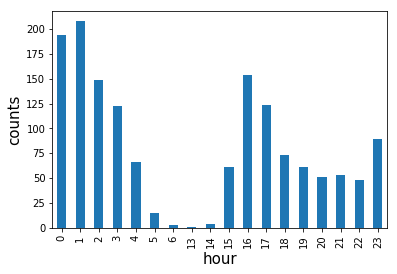

In [95]:
df_updates_copy['hour'].value_counts().sort_index(axis=0, ascending=True).plot(kind = 'bar')
plt.ylabel('counts', fontsize = 15)
plt.xlabel('hour', fontsize = 15)

从图中我们可以看出， 凌晨时段和下午傍晚时段， 该用户发推特比较多

##### 2.哪些种类的狗狗获得了较高的转发数？

Text(0.5, 0, 'dog_type')

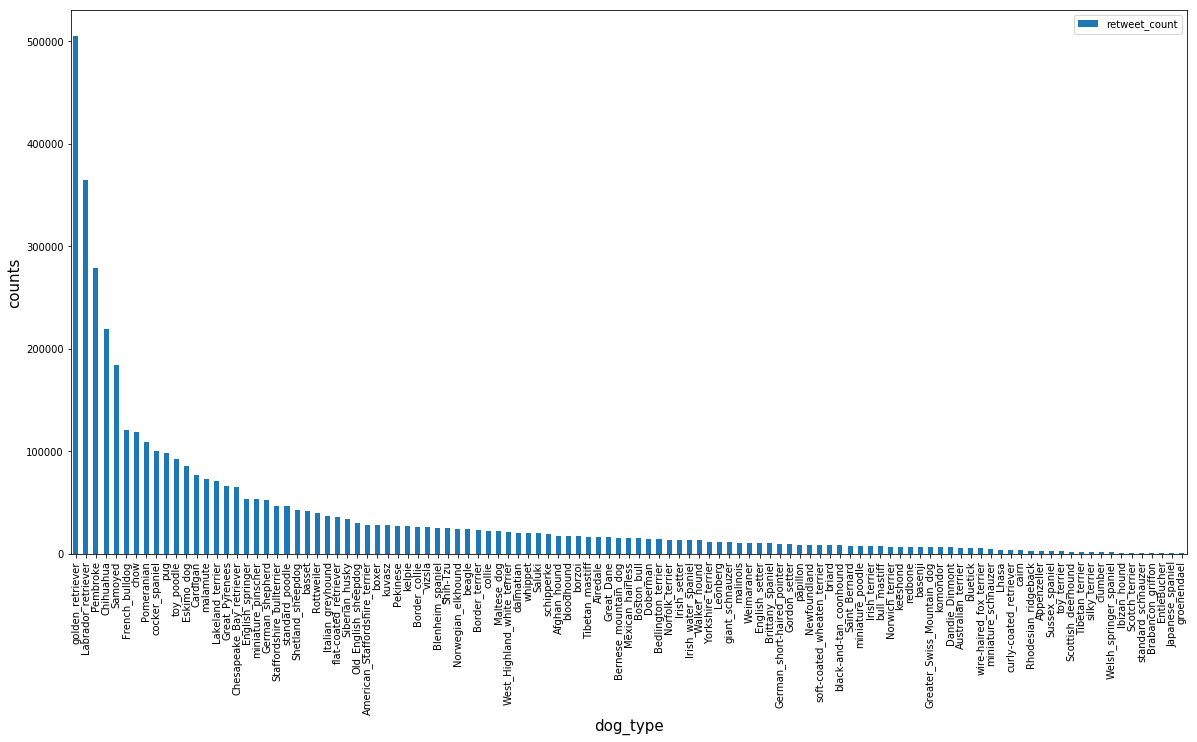

In [96]:
df_updates_copy[['retweet_count', 'p1']].groupby('p1').sum().sort_values(by = 'retweet_count', ascending = False).plot(kind = 'bar', figsize=(20,10))
plt.ylabel('counts', fontsize = 15)
plt.xlabel('dog_type', fontsize = 15)

In [97]:
df_updates_copy[['retweet_count', 'p1']].groupby('p1').sum().sort_values(by = 'retweet_count', ascending = False)

,retweet_count
p1,
golden_retriever,505153
Labrador_retriever,364632
Pembroke,278975
Chihuahua,219521
Samoyed,183897
French_bulldog,121066
chow,118926
Pomeranian,108798
cocker_spaniel,100024


我们可以看到golden_retriever比较受欢迎， 得到了最多的转发数

##### 3.得到了高评分的狗狗得到的转发数就一定多吗？

In [98]:
df_updates_copy['rating_denominator'].value_counts()

10.0     1464
50.0        2
80.0        2
130.0       1
150.0       1
110.0       1
40.0        1
90.0        1
20.0        1
11.0        1
0.0         1
70.0        1
Name: rating_denominator, dtype: int64

In [99]:
df_updates_copy[df_updates_copy['rating_denominator'] == 0.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,status,hour
312,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",0.0,0.0,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,1647,5904,None,23


In [100]:
df_updates_copy['rates_final'] = df_updates_copy['rating_numerator'] / df_updates_copy['rating_denominator']

In [101]:
df_updates_copy['rates_final'] = df_updates_copy['rates_final'].round(3)

In [102]:
# 由于数据中存在一列 分子分母皆为0的情况，我们对该数据进行处理
df_updates_copy['rates_final'].fillna(0, inplace = True)

In [103]:
df_updates_copy[['rates_final']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 1 columns):
rates_final    1477 non-null float64
dtypes: float64(1)
memory usage: 11.6 KB


In [104]:
temporary_1 = df_updates_copy[['retweet_count', 'rates_final']]

In [105]:
temporary_1.groupby('rates_final').mean().sort_index(ascending = False)

,retweet_count
rates_final,
1.400,8851.857143
1.350,10336.000000
1.300,6950.200935
1.200,2987.981675
1.127,1867.000000
1.126,542.000000
1.100,2074.566879
1.000,1357.015674
0.975,7033.000000


Text(0.5, 0, 'dog_rates')

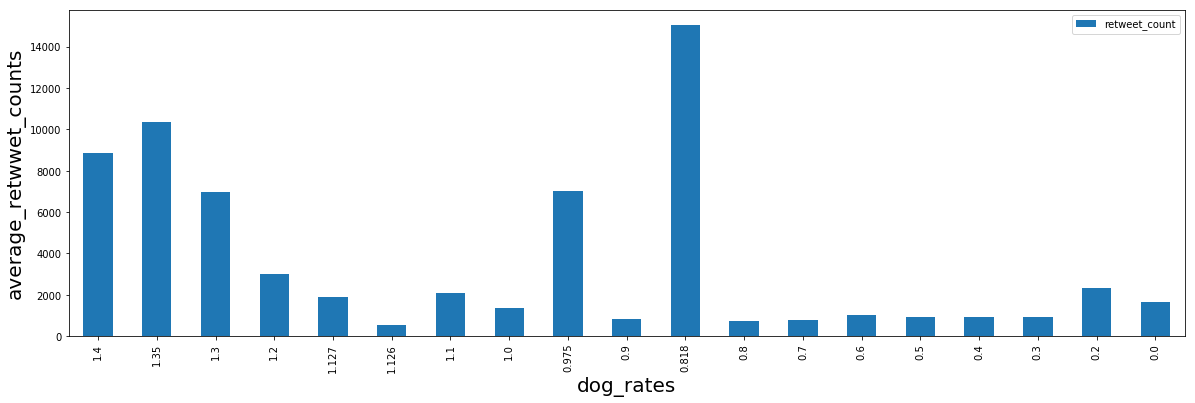

In [106]:
temporary_1.groupby('rates_final').mean().sort_index(ascending = False).plot(kind = 'bar', figsize=(20,6))
plt.ylabel('average_retwwet_counts', fontsize = 20)
plt.xlabel('dog_rates', fontsize = 20)

In [107]:
df_updates_copy['retweet_count'].corr(df_updates_copy['rates_final'])

0.32767040269273967

综合得出，狗狗的评分高低和得到多的转发数多少关系不大

##### 4. 数据中狗狗评分的高低和所处于的地位有什么关系？

In [108]:
df_updates_copy['status'].value_counts()

None              1245
pupper             146
doggo               53
puppo               20
floofer              7
doggo & pupper       6
Name: status, dtype: int64

In [109]:
data_to_delete_index2 = df_updates_copy[df_updates_copy['status'] == 'None'].index

In [110]:
df_updates_copy.drop(index = data_to_delete_index2, inplace = True)

In [111]:
temporary_3 = df_updates_copy[['status', 'rates_final']]

In [112]:
temporary_3

,status,rates_final
7,doggo,1.400
10,puppo,1.300
12,puppo,1.300
24,pupper,1.200
33,doggo,1.200
36,floofer,1.300
39,pupper,1.200
44,pupper,1.400
53,puppo,1.300
60,pupper,1.200


In [113]:
temporary_3.groupby('rates_final')['status'].value_counts()

rates_final  status        
0.700        pupper             2
0.800        pupper             5
             doggo              2
             doggo & pupper     1
0.900        pupper            11
             doggo & pupper     1
             puppo              1
1.000        pupper            34
             doggo              3
             puppo              3
             doggo & pupper     2
             floofer            1
1.100        pupper            38
             doggo             12
             doggo & pupper     1
             floofer            1
             puppo              1
1.127        pupper             1
1.200        pupper            39
             doggo             15
             puppo              5
             floofer            2
             doggo & pupper     1
1.300        doggo             16
             pupper            12
             puppo              9
             floofer            3
1.400        doggo              5
             pupper 

观察数据发现，数据中狗狗评分的高低和所处于的地位关系不大，评分中的地位大多被pupper和doggo占据。

#### 得出结论

1. 在一天中的哪个时段，该用户发推文比较多？   
    凌晨时段和下午傍晚时段。

2. 哪些种类的狗狗获得了较高的转发数？        
    golden_retriever得到了最多的转发数。

3. 得到了高评分的狗狗得到的转发数就一定多吗？<br/> 
    狗狗的评分高低和得到多的转发数多少关系不大。

4. 数据中狗狗评分的高低和所处于的地位有什么关系？<br/>
    关系不大，评分中的地位大多被pupper和doggo占据。